<a href="https://colab.research.google.com/github/workhardzy/K6312/blob/main/data_analysis_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

analysis of topic

In [ ]:
#import csv
df = pd.read_csv('/content/gdrive/MyDrive/covid_mining/update selected/topic_labelled.csv',encoding='utf-8').drop('Unnamed: 0',axis=1)

In [ ]:
#inspect dataframe
df.drop_duplicates()

,title,url,crawled_time,date,domain,author,content,topic_area,predicted,predicted_probability,topic_label
0,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,2020-05-19,2020-01-02,marketbeat,Thomas Hughes,"Posted on Thursday, January 2nd, 2020 by Thoma...",business,16,[0.0671662 0.03376345 0.02943588 0.06452676 0...,financial
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,2020-05-19,2020-01-03,marketbeat,Steve Anderson,"It could be forgiven, that some might think th...",business,16,[0.04483881 0.03479516 0.01047461 0.01134168 0...,financial
2,Six Flags is in For a Wild Ride (SIX),https://www.marketbeat.com/originals/six-flags...,2020-05-19,2020-01-15,marketbeat,Chris Markoch,"Posted on Wednesday, January 15th, 2020 by Chr...",business,16,[0.09952336 0.05148712 0.09299702 0.02517378 0...,financial
3,A Breakdown of the Most Common Order Types,https://www.marketbeat.com/originals/a-breakdo...,2020-05-19,2020-01-15,marketbeat,Sean Sechler,"So, the day has finally come for you to place ...",business,16,[0.04070079 0.04033574 0.03455137 0.03810173 0...,financial
4,How much longer will we trust Google’s search ...,https://www.theverge.com/tech/2020/1/24/210796...,2020-03-20,2020-01-24,theverge,Dieter Bohn,Happy Friday to you! I have been reflecting a ...,tech,16,[0.00488467 0.00505404 0.00456435 0.00494218 0...,financial
...,...,...,...,...,...,...,...,...,...,...,...
290474,'Sorloth wants to go' - Trabzonspor resigned t...,https://uk.finance.yahoo.com/news/sorloth-want...,2020-09-13,2020-09-13,finance.yahoo,NaN,The president of Trabzonspor has admitted that...,business,21,[0.03559447 0.07260679 0.03221311 0.03509286 0...,hedge fund
290475,The reality of 'Selling Sunset': Cleaning toil...,https://finance.yahoo.com/news/reality-selling...,2020-09-13,2020-09-13,finance.yahoo,NaN,As one of the biggest shows on Netflix right n...,business,21,[0.03692139 0.03606836 0.03035614 0.03368004 0...,hedge fund
290476,Matt Chapman Done for the Year,https://finance.yahoo.com/news/matt-chapman-do...,2020-09-13,2020-09-13,finance.yahoo,NaN,The A’s received terrible news early on Saturd...,business,21,[0.0165899 0.04932331 0.02816671 0.04659152 0...,hedge fund
290477,When You Love — and Loathe — Watching the N.F.L.,https://www.nytimes.com/2020/09/14/sports/foot...,2020-09-14,2020-09-14,nytimes,By Kurt Streeter,It was the return of a lost love. Did you savo...,business,21,[0.03757714 0.03724011 0.03189967 0.03517755 0...,hedge fund


In [ ]:
#doing descriptive analysis on a column
counts = df['topic_label'].value_counts()
percentage = df['topic_label'].value_counts(normalize=True)
dfa = pd.concat([counts,percentage],axis=1)
dfa.columns = ['counts','percentages']
dfa

,counts,percentages
financial,34734,0.119575
coronavirus vaccine,25199,0.086750
coronavirus lockdown,21196,0.072969
Trump,14951,0.051470
stock market,14632,0.050372
Covid test,14206,0.048905
coronavirus impact,13931,0.047959
fight covid,13654,0.047005
china coronavirus/virus,12880,0.044341
Coronavirus pandemic,12712,0.043762


In [ ]:
df['date'] = pd.to_datetime(df['date'])
#converting string to datetime
df['month'] = df['date'].dt.month
df['month'].value_counts()

7    67764
5    43661
4    42481
3    40339
6    39336
8    30642
9    16542
2     7761
1     1953
Name: month, dtype: int64

In [ ]:
#splitting topic by month
df[['topic_label','month']]
pd.crosstab(df.topic_label, df.month)


month,1,2,3,4,5,6,7,8,9
topic_label,,,,,,,,,
Coronavirus pandemic,17,154,1941,2027,1957,1647,2882,1309,778
Covid test,38,302,2188,1949,2092,1505,3350,1704,1078
Social distance,13,62,1036,1269,1199,671,1891,939,717
Trump,33,204,1690,2046,2195,2264,3442,1877,1200
china coronavirus/virus,359,1228,1864,1218,1541,1814,3039,1214,603
conference call,30,94,230,414,992,999,1527,665,147
coronavirus case,90,467,1489,1296,1221,1826,3821,1313,732
coronavirus impact,58,351,1761,1094,964,1591,5010,1821,1281
coronavirus lockdown,71,445,4536,5981,5162,1599,2124,832,446


In [ ]:
path = '/content/gdrive/My Drive/covid_mining/covid19_articles_20200914.csv'
sem_df = pd.read_csv(path,encoding='UTF-8')

In [ ]:
sem_df.columns

Index(['Unnamed: 0', 'title', 'url', 'crawled_time', 'date', 'domain',
       'author', 'content', 'topic_area'],
      dtype='object')

In [ ]:
counts = sem_df['topic_area'].value_counts()
percentage = sem_df['topic_area'].value_counts(normalize=True)
dfa = pd.concat([counts,percentage],axis=1)
dfa.columns = ['counts','percentages']
dfa

,counts,percentages
business,210272,0.723880
general,53089,0.182764
finance,19892,0.068480
tech,4256,0.014652
science,1953,0.006723
healthcare,400,0.001377
environment,335,0.001153
automotive,267,0.000919
ai,15,0.000052


In [ ]:
sem_df['date'].describe()

count         290479
unique           254
top       2020-07-28
freq            3831
Name: date, dtype: object

# Analysis of sentiment

In [ ]:
df1 =  pd.DataFrame()
for i in range(9):
    month = i+1
    try:
        if month == 7:
            _1 = pd.read_csv('/content/gdrive/MyDrive/covid_mining/{}_1_sentiment_labled.csv'.format(month),encoding='utf-8').drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
            _2 = pd.read_csv('/content/gdrive/MyDrive/covid_mining/{}_2_sentiment_labled.csv'.format(month),encoding='utf-8').drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
            _3 = pd.read_csv('/content/gdrive/MyDrive/covid_mining/{}_3_sentiment_labled.csv'.format(month),encoding='utf-8').drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
            _4 = pd.read_csv('/content/gdrive/MyDrive/covid_mining/{}_4_sentiment_labled.csv'.format(month),encoding='utf-8').drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
            _ = pd.concat([_1,_2,_3,_4])
        else:
            _ = pd.read_csv('/content/gdrive/MyDrive/covid_mining/{}_sentiment_labled.csv'.format(month),encoding='utf-8').drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
        
        print('concatenating month:',month)
        _.columns = ['title','date','topic_area','sentiment']

        df1 = pd.concat([df1,_])

    except:
        #print(e)
        break

df1 = df1.drop_duplicates()
df1

concatenating month: 1
concatenating month: 2
concatenating month: 3
concatenating month: 4
concatenating month: 5
concatenating month: 6
concatenating month: 7
concatenating month: 8
concatenating month: 9


,title,date,topic_area,sentiment
0,Three Industrial Giants You Should Own In 2020,2020-01-02,business,0
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",2020-01-03,business,1
2,Labor Stocks Are Going To Break Out In 2020,2020-01-03,business,1
3,Cal-Maine Just Shed 12% - But Is Now The Time ...,2020-01-06,business,1
4,"China pneumonia outbreak: It's not SARS, so wh...",2020-01-06,business,1
...,...,...,...,...
16537,"Trump signs new, expanded executive order to l...",2020-09-14,business,0
16538,Nuggets force Game 7 and D'Antoni leaves HOU,2020-09-14,business,1
16539,Health Official Out To Manipulate CDC Reports ...,2020-09-14,business,1
16540,Global Markets: Asian shares buoyed by coronav...,2020-09-14,business,1


In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
#converting string to datetime
df1['month'] = df1['date'].dt.month
df1['month'].value_counts()

7    66953
5    43591
4    42480
3    40336
6    39025
8    30409
9    16301
2     7760
1     1953
Name: month, dtype: int64

In [ ]:
counts = df1['sentiment'].value_counts()
percentage = df1['sentiment'].value_counts(normalize=True)
dfb = pd.concat([counts,percentage],axis=1)
dfb.columns = ['counts','percentages']
dfb

,counts,percentages
1,156428,0.541633
0,132380,0.458367


In [ ]:
df1[['sentiment','month']]
pd.crosstab(df1.sentiment, df1.month)

month,1,2,3,4,5,6,7,8,9
sentiment,,,,,,,,,
0,852,3602,18413,19324,19905,17909,30762,14207,7406
1,1101,4158,21923,23156,23686,21116,36191,16202,8895


# Topic-based Sentiment Analysis

In [ ]:
df

,title,url,crawled_time,date,domain,author,content,topic_area,predicted,predicted_probability,topic_label,month
0,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,2020-05-19,2020-01-02,marketbeat,Thomas Hughes,"Posted on Thursday, January 2nd, 2020 by Thoma...",business,16,[0.0671662 0.03376345 0.02943588 0.06452676 0...,financial,1
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,2020-05-19,2020-01-03,marketbeat,Steve Anderson,"It could be forgiven, that some might think th...",business,16,[0.04483881 0.03479516 0.01047461 0.01134168 0...,financial,1
2,Six Flags is in For a Wild Ride (SIX),https://www.marketbeat.com/originals/six-flags...,2020-05-19,2020-01-15,marketbeat,Chris Markoch,"Posted on Wednesday, January 15th, 2020 by Chr...",business,16,[0.09952336 0.05148712 0.09299702 0.02517378 0...,financial,1
3,A Breakdown of the Most Common Order Types,https://www.marketbeat.com/originals/a-breakdo...,2020-05-19,2020-01-15,marketbeat,Sean Sechler,"So, the day has finally come for you to place ...",business,16,[0.04070079 0.04033574 0.03455137 0.03810173 0...,financial,1
4,How much longer will we trust Google’s search ...,https://www.theverge.com/tech/2020/1/24/210796...,2020-03-20,2020-01-24,theverge,Dieter Bohn,Happy Friday to you! I have been reflecting a ...,tech,16,[0.00488467 0.00505404 0.00456435 0.00494218 0...,financial,1
...,...,...,...,...,...,...,...,...,...,...,...,...
290474,'Sorloth wants to go' - Trabzonspor resigned t...,https://uk.finance.yahoo.com/news/sorloth-want...,2020-09-13,2020-09-13,finance.yahoo,NaN,The president of Trabzonspor has admitted that...,business,21,[0.03559447 0.07260679 0.03221311 0.03509286 0...,hedge fund,9
290475,The reality of 'Selling Sunset': Cleaning toil...,https://finance.yahoo.com/news/reality-selling...,2020-09-13,2020-09-13,finance.yahoo,NaN,As one of the biggest shows on Netflix right n...,business,21,[0.03692139 0.03606836 0.03035614 0.03368004 0...,hedge fund,9
290476,Matt Chapman Done for the Year,https://finance.yahoo.com/news/matt-chapman-do...,2020-09-13,2020-09-13,finance.yahoo,NaN,The A’s received terrible news early on Saturd...,business,21,[0.0165899 0.04932331 0.02816671 0.04659152 0...,hedge fund,9
290477,When You Love — and Loathe — Watching the N.F.L.,https://www.nytimes.com/2020/09/14/sports/foot...,2020-09-14,2020-09-14,nytimes,By Kurt Streeter,It was the return of a lost love. Did you savo...,business,21,[0.03757714 0.03724011 0.03189967 0.03517755 0...,hedge fund,9


In [ ]:
df1

,title,date,topic_area,sentiment,month
0,Three Industrial Giants You Should Own In 2020,2020-01-02,business,0,1
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",2020-01-03,business,1,1
2,Labor Stocks Are Going To Break Out In 2020,2020-01-03,business,1,1
3,Cal-Maine Just Shed 12% - But Is Now The Time ...,2020-01-06,business,1,1
4,"China pneumonia outbreak: It's not SARS, so wh...",2020-01-06,business,1,1
...,...,...,...,...,...
16537,"Trump signs new, expanded executive order to l...",2020-09-14,business,0,9
16538,Nuggets force Game 7 and D'Antoni leaves HOU,2020-09-14,business,1,9
16539,Health Official Out To Manipulate CDC Reports ...,2020-09-14,business,1,9
16540,Global Markets: Asian shares buoyed by coronav...,2020-09-14,business,1,9


In [ ]:
#combine both topic and sentiment dataset
combined_df = pd.merge(df,df1)
combined_df = combined_df[['title','topic_label', 'month', 'sentiment']]
combined_df

,title,topic_label,month,sentiment
0,Three Industrial Giants You Should Own In 2020,financial,1,0
1,"Tesla (TSLA) Breaks Shipment Record, Beats Estimates for Fourth Quarter Vehicles Shipped",financial,1,1
2,Six Flags is in For a Wild Ride (SIX),financial,1,0
3,A Breakdown of the Most Common Order Types,financial,1,1
4,How much longer will we trust Google’s search results?,financial,1,1
...,...,...,...,...
290474,'Sorloth wants to go' - Trabzonspor resigned to losing striker as Tottenham join RB Leipzig in transfer chase,hedge fund,9,0
290475,The reality of 'Selling Sunset': Cleaning toilets and no salary,hedge fund,9,0
290476,Matt Chapman Done for the Year,hedge fund,9,1
290477,When You Love — and Loathe — Watching the N.F.L.,hedge fund,9,1


In [ ]:
combined_df.columns

Index(['title', 'topic_label', 'month', 'sentiment'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

In [ ]:
pd.crosstab(combined_df.topic_label,combined_df.sentiment,normalize='index')

sentiment,0,1
topic_label,,
Coronavirus pandemic,0.434629,0.565371
Covid test,0.377587,0.622413
Social distance,0.362191,0.637809
Trump,0.459367,0.540633
china coronavirus/virus,0.472360,0.527640
conference call,0.474892,0.525108
coronavirus case,0.396002,0.603998
coronavirus impact,0.539373,0.460627
coronavirus lockdown,0.416163,0.583837


In [ ]:
dfc = pd.crosstab(combined_df.topic_label,combined_df.sentiment)
dfc = dfc.unstack().reset_index()
dfc.columns = ['sentiment','topic_label','count']

dfc_ = pd.crosstab(combined_df.topic_label,combined_df.sentiment,normalize='index')
dfc_ = dfc_.unstack().reset_index()
dfc_.columns = ['sentiment','topic_label','percentage']
dfc = pd.merge(dfc,dfc_)
dfc.sort_values('topic_label')

,sentiment,topic_label,count,percentage
0,0,Coronavirus pandemic,5525,0.434629
24,1,Coronavirus pandemic,7187,0.565371
25,1,Covid test,8842,0.622413
1,0,Covid test,5364,0.377587
2,0,Social distance,2824,0.362191
26,1,Social distance,4973,0.637809
3,0,Trump,6868,0.459367
27,1,Trump,8083,0.540633
4,0,china coronavirus/virus,6084,0.472360
28,1,china coronavirus/virus,6796,0.527640


In [ ]:
#negative sentiment
dfc[dfc['sentiment']==0].sort_values('percentage',ascending=False).head()

,sentiment,topic_label,count,percentage
14,0,financial,19603,0.564375
21,0,stock market,8049,0.550096
7,0,coronavirus impact,7514,0.539373
19,0,oil price,6637,0.526495
16,0,job,3210,0.489478


In [ ]:
dfc[dfc['sentiment']==1].sort_values('percentage',ascending=False).head()

,sentiment,topic_label,count,percentage
42,1,new york,6433,0.640546
26,1,Social distance,4973,0.637809
25,1,Covid test,8842,0.622413
44,1,small business,3826,0.610305
30,1,coronavirus case,7402,0.603998


financial
  month sentiment
            count
0     1        21
1     2       283
2     3      2038
3     4      2250
4     5      2670
5     6      2179
6     7      3243
7     8      1913
8     9       534
  month sentiment
            count
0     1        20
1     2       209
2     3      1544
3     4      2895
4     5      4553
5     6      2297
6     7      4499
7     8      3068
8     9       518


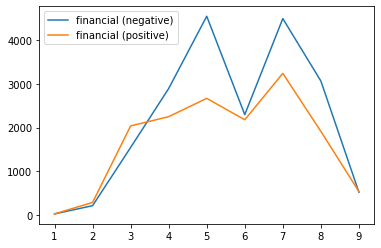

coronavirus vaccine
  month sentiment
            count
0     1        20
1     2        89
2     3      1426
3     4      1536
4     5      1710
5     6      2235
6     7      4426
7     8      2008
8     9      1193
  month sentiment
            count
0     1         9
1     2        50
2     3       957
3     4      1100
4     5      1241
5     6      1725
6     7      3255
7     8      1325
8     9       894


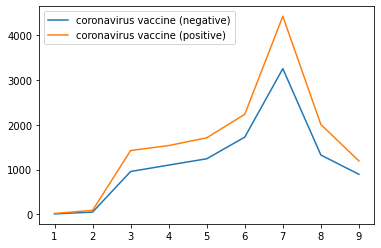

coronavirus lockdown
  month sentiment
            count
0     1        37
1     2       275
2     3      2556
3     4      3477
4     5      3094
5     6       949
6     7      1231
7     8       497
8     9       259
  month sentiment
            count
0     1        34
1     2       170
2     3      1980
3     4      2504
4     5      2068
5     6       650
6     7       893
7     8       335
8     9       187


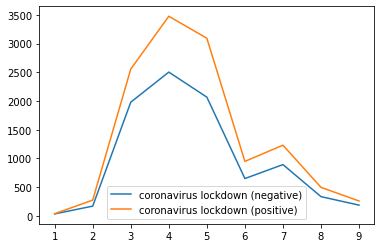

Trump
  month sentiment
            count
0     1        22
1     2       116
2     3       875
3     4      1160
4     5      1288
5     6      1160
6     7      1839
7     8       989
8     9       634
  month sentiment
            count
0     1        11
1     2        88
2     3       815
3     4       886
4     5       907
5     6      1104
6     7      1603
7     8       888
8     9       566


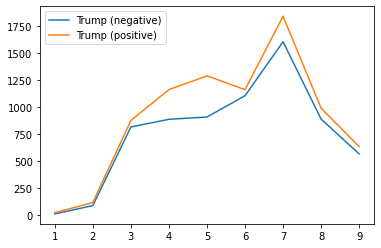

stock market
  month sentiment
            count
0     1        59
1     2       228
2     3       562
3     4       635
4     5       887
5     6      1389
6     7      1796
7     8       661
8     9       366
  month sentiment
            count
0     1        69
1     2       369
2     3       938
3     4       890
4     5      1061
5     6      1745
6     7      1744
7     8       788
8     9       445


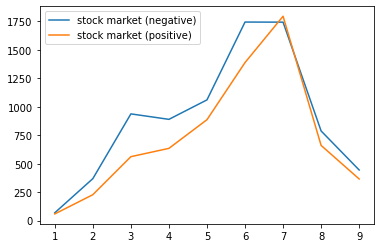

In [ ]:
def create_plot(topic):
    topic = topic
    print(combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==1)].groupby('month').agg({'sentiment': ['count']}).reset_index())
    print(combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==0)].groupby('month').agg({'sentiment': ['count']}).reset_index())
    
    x = combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==0)].groupby('month').agg({'sentiment': ['count']}).reset_index().month
    y = combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==0)].groupby('month').agg({'sentiment': ['count']}).reset_index().sentiment

    x1 = combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==1)].groupby('month').agg({'sentiment': ['count']}).reset_index().month
    y1 = combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==1)].groupby('month').agg({'sentiment': ['count']}).reset_index().sentiment
    
    plt.plot(x, y, label = topic+' (negative)')
    plt.plot(x1, y1, label = topic+' (positive)')

    locator = matplotlib.ticker.MultipleLocator(1)
    plt.gca().xaxis.set_major_locator(locator)
    formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.legend()
    plt.show()

top5 = ['financial','coronavirus vaccine','coronavirus lockdown','Trump','stock market']
for topic in top5:
    print(topic)
    create_plot(topic)

In [ ]:
pd.set_option('display.max_colwidth', -1)
topic = 'Trump'
combined_df[(combined_df.topic_label==topic) & (combined_df.sentiment==1) & combined_df.title.str.contains('coronavirus')].iloc[300:350]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,title,topic_label,month,sentiment
242427,Trump doubles down on unproven drug hydroxychloroquine to treat and prevent coronavirus - CNNPolitics,Trump,4,1
242438,Trump attacks HHS report finding hospitals face severe shortage of coronavirus testing supplies - MarketWatch,Trump,4,1
242445,Trump again touts unproven drug to treat coronavirus: ‘What do you have to lose?’ - MarketWatch,Trump,4,1
242456,Cineworld talks with landlords and studios to weather coronavirus | Business | The Guardian,Trump,4,1
242460,Trump says $70 billion in coronavirus rescue loans authorized. But where's the cash? - Reuters,Trump,4,1
242461,Trump slams U.S. watchdog's report on shortages at coronavirus-hit hospitals - Reuters,Trump,4,1
242464,Hydroxychloroquine: how an unproven drug became Trump’s coronavirus 'miracle cure' | World news | The Guardian,Trump,4,1
242471,Donald Macaskill: 'Some coronavirus guidance on older patients is immoral and illegal' | Society | The Guardian,Trump,4,1
242480,Donald Trump's drugs 'to help Boris Johnson' not tested against coronavirus | US news | The Guardian,Trump,4,1
242481,Donald Trump 'lost $1bn in a month' from coronavirus lockdown | Business | The Guardian,Trump,4,1
